Saving namib.npy to namib (1).npy


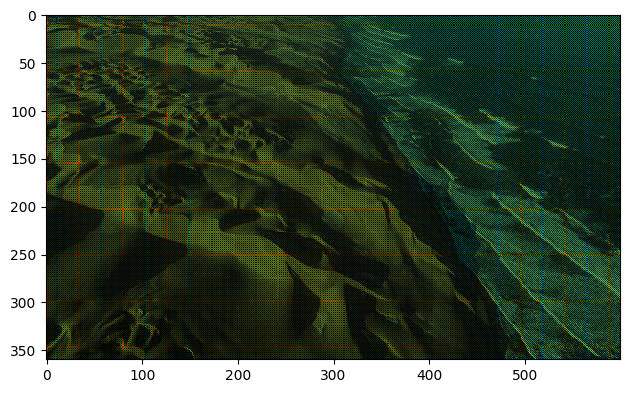

In [75]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d
from google.colab import files
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow


uploaded = files.upload()
image_path = next(iter(uploaded))

image = np.load(image_path)
io.imshow(image)

In [91]:
image = image[:,:,:3]
image = transform.resize(image, output_shape=(1024,1024,3))
image.shape

(1024, 1024, 3)

In [92]:

def color_filter(mask, shape):
    return np.dstack([np.tile(color_mask, np.asarray(shape) // len (color_mask)) for color_mask in mask])

In [79]:
def color_filter_array(mask, shape):
    """Simulate CFA for given mask and image size"""
    num_channels = mask.shape[0]
    return np.dstack(
        [
            np.tile(mask[channel], np.asarray(shape) // len(mask[channel]))
            for channel in range(num_channels)
        ]
    )


In [93]:
bayer_mask = np.array([[[0, 1], [0, 0]],
                       [[1, 0], [0, 1]],
                       [[0, 0], [1, 0]]], dtype=np.uint8)

bayer_mask.shape

(3, 2, 2)

In [94]:

bayer_filter = color_filter(bayer_mask, shape = np.array([1024,1024]))

In [82]:


bayer_filter[:4, :4, 1]  # green mask for bayer filter



array([[1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1]], dtype=uint8)

In [83]:
bayer_filter[:4, :4, 0]  # red mask for bayer filter

array([[0, 1, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 0, 1],
       [0, 0, 0, 0]], dtype=uint8)

In [84]:
bayer_filter[:4, :4, 2]  # blue mask for bayer filter

array([[0, 0, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 1, 0]], dtype=uint8)

In [85]:


image.shape, bayer_filter.shape



((1024, 1024, 3), (1024, 1024, 3))

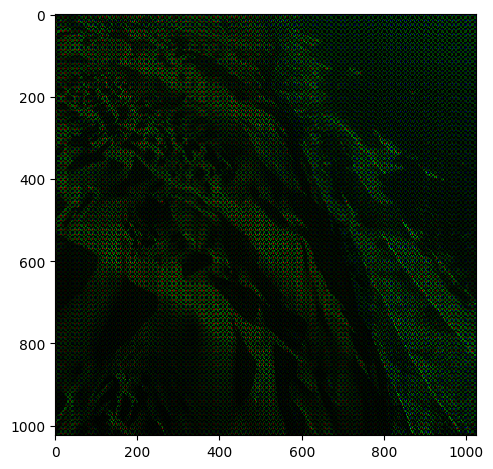

In [86]:
sensor_image = image * bayer_filter
_ = io.imshow(sensor_image)

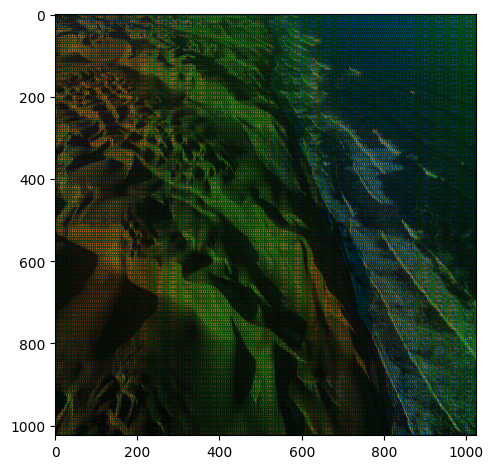

In [99]:


reconstructed_image = np.dstack([
    ndimage.convolve(sensor_image[:, :, channel], demosaicking_convolution_mask[:, :, channel], mode="constant", cval=0.0)
    for channel in range(3)
])

_ = io.imshow(reconstructed_image)



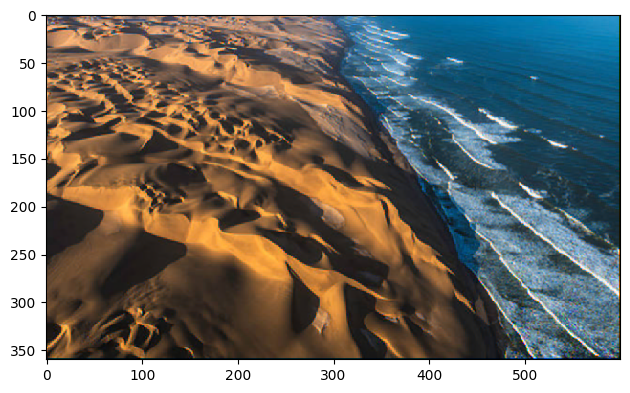

In [100]:
demosaicking_convolution_mask = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])
reconstructed_image = np.dstack([
    # mode needs to be constant or demosaicking mask will "catch" more than single nonzero pixel along the edges
    ndimage.convolve(image[:, :, channel], demosaicking_convolution_mask[:, :, channel], mode="constant", cval=0.0)
    for channel in range(3)
])

_ = io.imshow(reconstructed_image)